### 关于商店广告费用与销售额关系的数据分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

导入数据

In [2]:
df_ad = pd.read_excel(r"D:\ProgramData\data\bussinessdata\data\广告费.xlsx")
df_ad.head()

,投放日期,支出
0,2019-01-01,810
1,2019-01-01,519
2,2019-01-01,396
3,2019-01-01,278
4,2019-01-01,210


In [3]:
df_sal = pd.read_excel(r"D:\ProgramData\data\bussinessdata\data\销售表.xlsx")
df_sal.head()

,日期,商品名称,成交件数,销售码洋
0,2019-01-01,Python从入门到项目实践（全彩版）,36,3592.8
1,2019-01-01,零基础学Python（全彩版）,28,2234.4
2,2019-01-01,零基础学C语言（全彩版）,20,1396.0
3,2019-01-01,零基础学Java（全彩版）,26,1814.8
4,2019-01-01,SQL即查即用（全彩版）,12,597.6


查看缺失值

In [4]:
df_ad.isna().sum()
df_sal.isna().sum()
# 均无缺失值

日期      0
商品名称    0
成交件数    0
销售码洋    0
dtype: int64

查看数据的完整性

In [5]:
df_ad.info(),df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11815 entries, 0 to 11814
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   投放日期    11815 non-null  datetime64[ns]
 1   支出      11815 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 184.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11815 entries, 0 to 11814
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日期      11815 non-null  datetime64[ns]
 1   商品名称    11815 non-null  object        
 2   成交件数    11815 non-null  int64         
 3   销售码洋    11815 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 369.3+ KB


(None, None)

每天/每月的广告费用支出情况分析

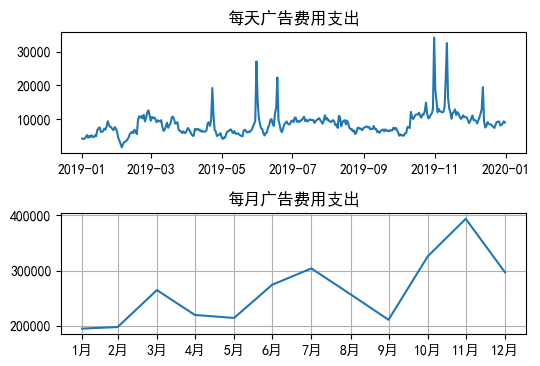

In [6]:
df_adn = df_ad.set_index("投放日期",drop=True)
df_adf = df_adn.resample("D").sum()
df_adfm = df_adn.resample("M").sum()
fig = plt.subplot(2,1,1)
plt.subplots_adjust(hspace=0.5)
plt.plot(df_adf.index,df_adf.支出)
plt.title("每天广告费用支出")
fig = plt.subplot(2,1,2)  
plt.plot(df_adfm.index,df_adfm.支出)
plt.title("每月广告费用支出")
plt.xticks(df_adfm.index,labels=[str(i)+"月" for i in range(1,13)])
plt.grid()

每天/每月销售额情况分析

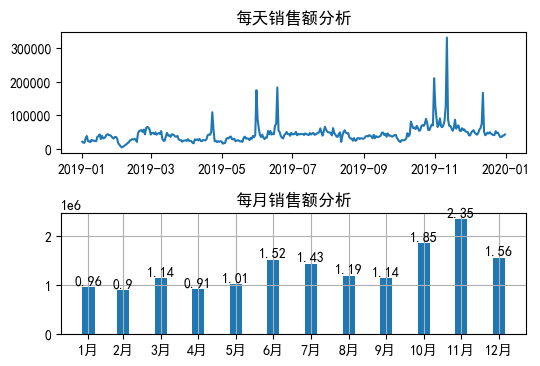

In [29]:
df_saln = df_sal.set_index("日期",drop=True)
df_salf = df_saln.resample("D").sum()
df_salm = df_saln.resample("M").sum()

fig = plt.subplot(2,1,1)
plt.plot(df_salf.index,df_salf.销售码洋)
plt.title("每天销售额分析")

fig = plt.subplot(2,1,2)
plt.subplots_adjust(hspace=0.5)
bar_sal = plt.bar(df_salm.index,df_salm.销售码洋,width=10)
plt.bar_label(bar_sal,labels=np.around(df_salm.销售码洋/1000000,2))
plt.title("每月销售额分析")
plt.xticks(df_salm.index,labels=[str(i)+"月" for i in range(1,13)])
plt.yticks()

plt.grid()

In [20]:
df_salm.销售码洋.dtype

dtype('float64')

分析广告费用与销售额之间是否存在正相关

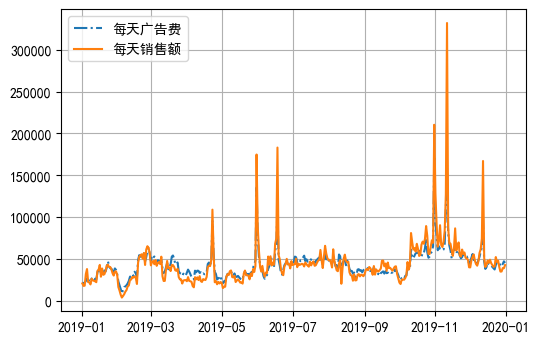

In [32]:
df_rel = pd.DataFrame(df_adf["支出"])
df_rel["销售额"] = df_salf["销售码洋"]
df_rel.columns = ["广告费","销售额"]

df_rel.sort_values(by="广告费")

plt.plot(df_rel.index,df_rel.广告费*5,'-.')
plt.plot(df_rel.index,df_rel.销售额)

plt.legend(["每天广告费","每天销售额"])
plt.grid()

从上图可以看出，每天投入的广告费用与销售额之间的走势，基本保持一致  
(广告费用与销售额数据之间存在数量级差距，这里将广告费用的数据放大五倍进行分析)

我们还可以从每月的广告费与销售额走势图看出

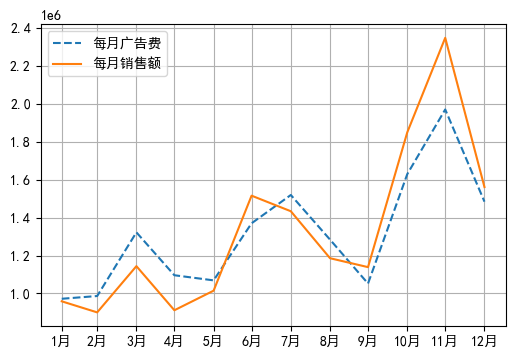

In [33]:
df_relm = df_rel.resample("M").sum()

plt.plot(df_relm.index,df_relm.广告费*5,'--')
plt.xticks(df_relm.index,labels=[str(i)+"月" for i in range(1,13)])

plt.plot(df_relm.index,df_relm.销售额)
plt.xticks(df_relm.index,labels=[str(i)+"月" for i in range(1,13)])

plt.legend(["每月广告费","每月销售额"])
plt.grid()

从上图可以看出广告费用与销售额之间存在正相关性

---

##### 使用SKlearn的线性回归对广告费与销售额进行模型预测(这里先使用每天的数据)

In [34]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# 数据使用
x = np.array(df_ad.支出.tolist()).reshape(-1,1)
y = np.array(df_sal.销售码洋.tolist()).reshape(-1,1)
# 分别建立训练集与测试集
x_train,x_text,y_train,y_text = train_test_split(x,y,test_size = 0.33)
# 建立模型
lgress = LinearRegression()
lgress.fit(x_train,y_train)

# 权重向量b,k
b = lgress.coef_[0][0]
k = lgress.intercept_[0]
b,k

# 拟合方程：Y = b*X + k

(5.113443367676763, -13.87516445901224)

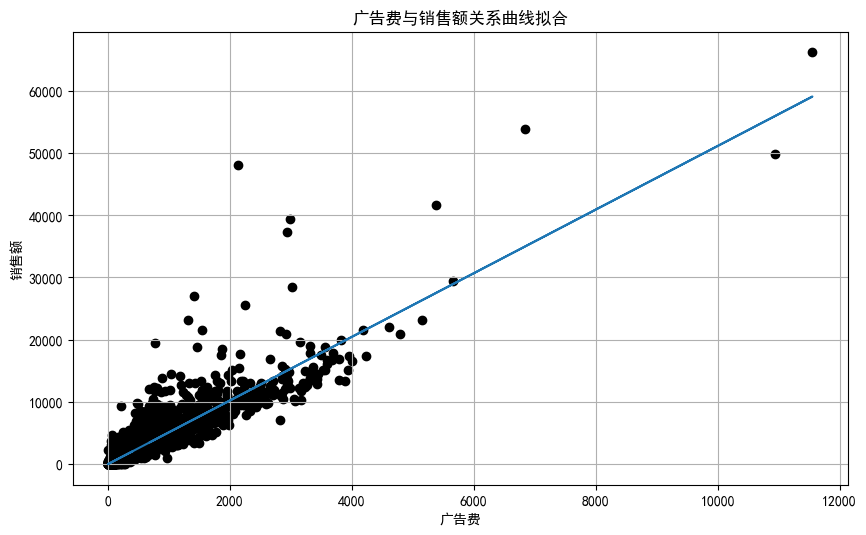

In [35]:
# 模型预测
prediction = lgress.predict(x_train)

# 可视化
fig = plt.figure(figsize=(10,6))
plt.scatter(x_train,y_train,c='black')
plt.plot(x_train,prediction)
plt.xlabel("广告费")
plt.ylabel("销售额")
plt.title('广告费与销售额关系曲线拟合')
plt.grid()

决定系数 $ R^2 $ (拟合度)

In [36]:
from sklearn.metrics import r2_score
r2_score(y_train,prediction)

0.8217734703328956

使用建立的模型对y_test测试集进行预测

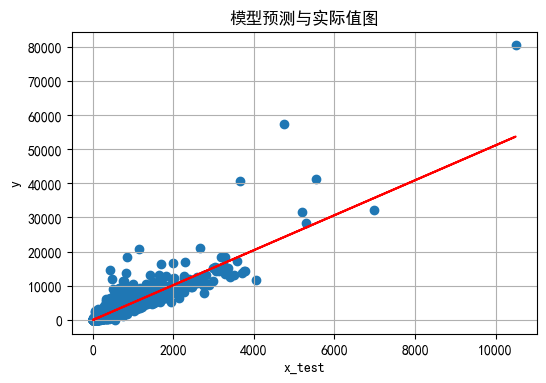

In [37]:
y_predict = lgress.predict(x_text)

plt.scatter(x_text,y_text)
plt.plot(x_text,y_predict,c="red")
plt.title("模型预测与实际值图")
plt.xlabel("x_test")
plt.ylabel("y")
plt.grid()

In [38]:
r2_score(y_text,y_predict)

0.8258860838922792

##### 使用每月的数据进行模型建立

In [37]:
x_m = np.array(df_adfm.支出).reshape(-1,1)
y_m = np.array(df_salm.销售码洋).reshape(-1,1)

In [38]:
lgsion = linear_model.LinearRegression()
lgsion.fit(x_m,y_m)

# 获取权重向量
b = lgsion.coef_[0][0]
k = lgsion.intercept_[0]

# 拟合曲线 Y = b*X + k
b,k

(6.922356163948851, -487521.7114703364)

In [27]:
predict_m = lgsion.predict(x_m)     # 拟合曲线

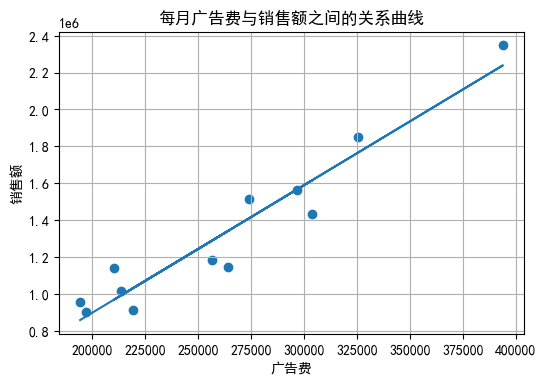

In [31]:
# 可视化
plt.scatter(x_m,y_m)
plt.plot(x_m,predict_m)
plt.title("每月广告费与销售额之间的关系曲线")
plt.xlabel("广告费")
plt.ylabel("销售额")
plt.grid()

决定系数 $ R^2 $ (拟合度)

In [50]:
r2_score(y_m,predict_m)

0.9202023312960123

拟合度达到92.02%，建立的模型与数据已相当吻合。